<a href="https://colab.research.google.com/github/baker371/k8-data-visualization/blob/master/Data_analysis_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1: By Lwasampijja Baker - Upwork 


## Installing and Importing Dependencies

In [ ]:
# pip install requests
import requests
import json 
import os
from pprint import pprint
import pandas as pd 
from pandas.io.json import json_normalize #package for flattening json in pandas df
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Parameters to help us display all columns and rows when called upon
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.expand_frame_repr', False)

Importing Data from the different projects

In [ ]:
token = os.getenv('GITHUB_TOKEN', 'ea7035cbe89a9ca1a9e3517804ab022df97d7d7b')

query_pi = f"https://api.github.com/repos/filetrust/program-icap/issues"
query_mis = f"https://api.github.com/repos/filetrust/mvp-icap-service/issues"
query_mic = f"https://api.github.com/repos/filetrust/mvp-icap-cloud/issues"
query_mip = f"https://api.github.com/repos/filetrust/mvp-icap-squid-cache-proxy/issues"
query_rkf = f"https://api.github.com/repos/filetrust/rebuild-k8s-filetypedetection/issues"
query_ipt = f"https://api.github.com/repos/filetrust/icap-performance-tests/issues"
query_rks = f"https://api.github.com/repos/filetrust/rebuild-k8s/issues"
query_cap = f"https://api.github.com/repos/filetrust/c-icap/issues"



params = {
    "state": "all",
}
headers = {'Authorization': f'token {token}'}

r1 = requests.get(query_pi, headers=headers, params=params)
r2 = requests.get(query_mis, headers=headers, params=params)
r3 = requests.get(query_mic, headers=headers, params=params)
r4 = requests.get(query_mip, headers=headers, params=params)
r5 = requests.get(query_rkf, headers=headers, params=params)
r6 = requests.get(query_ipt, headers=headers, params=params)
r7 = requests.get(query_rks, headers=headers, params=params)
r8 = requests.get(query_cap, headers=headers, params=params)

data1 = r1.json() 
data2 = r2.json() 
data3 = r3.json() 
data4 = r4.json() 
data5 = r5.json() 
data6 = r6.json() 
data7 = r7.json() 
data8 = r8.json() 



Normalising the Data

In [ ]:
data1 = json_normalize(data1, max_level=1)
data2 = json_normalize(data2, max_level=1)
data3 = json_normalize(data3, max_level=1)
data4 = json_normalize(data4, max_level=1)
data5 = json_normalize(data5, max_level=1)
data6 = json_normalize(data6, max_level=1)
data7 = json_normalize(data7, max_level=1)
data8 = json_normalize(data8, max_level=1)

Turning the JSON to Pandas datafrme

In [ ]:
df1 = pd.DataFrame.from_dict(data1)
df2 = pd.DataFrame.from_dict(data2)
df3 = pd.DataFrame.from_dict(data3)
df4 = pd.DataFrame.from_dict(data4)
df5 = pd.DataFrame.from_dict(data5)
df6 = pd.DataFrame.from_dict(data6)
df7 = pd.DataFrame.from_dict(data7)
df8 = pd.DataFrame.from_dict(data8)


Adding project name column to the dataframe



In [ ]:
df1['project']='program-icap'
df2['project']='mvp-icap-service'
df3['project']='mvp-icap-cloud'
df4['project']='mvp-icap-squid-cache-proxy'
df5['project']='rebuild-k8s-filetypedetection'
df6['project']='icap-performance-tests'
df7['project']='rebuild-k8s'
df8['project']='c-icap'

Merging all the dataframes into one

In [ ]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7,df8], ignore_index=True)
df.head()

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,labels,state,locked,assignee,assignees,milestone,comments,created_at,updated_at,closed_at,author_association,active_lock_reason,body,performed_via_github_app,user.login,user.id,user.node_id,user.avatar_url,user.gravatar_id,user.url,user.html_url,user.followers_url,user.following_url,user.gists_url,user.starred_url,user.subscriptions_url,user.organizations_url,user.repos_url,user.events_url,user.received_events_url,user.type,user.site_admin,project,assignee.login,assignee.id,assignee.node_id,assignee.avatar_url,assignee.gravatar_id,assignee.url,assignee.html_url,assignee.followers_url,assignee.following_url,assignee.gists_url,assignee.starred_url,assignee.subscriptions_url,assignee.organizations_url,assignee.repos_url,assignee.events_url,assignee.received_events_url,assignee.type,assignee.site_admin,pull_request.url,pull_request.html_url,pull_request.diff_url,pull_request.patch_url,milestone.url,milestone.html_url,milestone.labels_url,milestone.id,milestone.node_id,milestone.number,milestone.title,milestone.description,milestone.creator,milestone.open_issues,milestone.closed_issues,milestone.state,milestone.created_at,milestone.updated_at,milestone.due_on,milestone.closed_at
0,https://api.github.com/repos/filetrust/program-icap/issues/1,https://api.github.com/repos/filetrust/program-icap,https://api.github.com/repos/filetrust/program-icap/issues/1/labels{/name},https://api.github.com/repos/filetrust/program-icap/issues/1/comments,https://api.github.com/repos/filetrust/program-icap/issues/1/events,https://github.com/filetrust/program-icap/issues/1,676051415.0,MDU6SXNzdWU2NzYwNTE0MTU=,1.0,Trial Epic,[],closed,False,None,[],None,1.0,2020-08-10T11:04:57Z,2020-08-13T09:11:23Z,2020-08-13T09:11:23Z,COLLABORATOR,None,,None,BigPeeg,1354372.0,MDQ6VXNlcjEzNTQzNzI=,https://avatars0.githubusercontent.com/u/1354372?v=4,,https://api.github.com/users/BigPeeg,https://github.com/BigPeeg,https://api.github.com/users/BigPeeg/followers,https://api.github.com/users/BigPeeg/following{/other_user},https://api.github.com/users/BigPeeg/gists{/gist_id},https://api.github.com/users/BigPeeg/starred{/owner}{/repo},https://api.github.com/users/BigPeeg/subscriptions,https://api.github.com/users/BigPeeg/orgs,https://api.github.com/users/BigPeeg/repos,https://api.github.com/users/BigPeeg/events{/privacy},https://api.github.com/users/BigPeeg/received_events,User,False,program-icap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://api.github.com/repos/filetrust/mvp-icap-service/issues/8,https://api.github.com/repos/filetrust/mvp-icap-service,https://api.github.com/repos/filetrust/mvp-icap-service/issues/8/labels{/name},https://api.github.com/repos/filetrust/mvp-icap-service/issues/8/comments,https://api.github.com/repos/filetrust/mvp-icap-service/issues/8/events,https://github.com/filetrust/mvp-icap-service/issues/8,681865962.0,MDU6SXNzdWU2ODE4NjU5NjI=,8.0,Durable file component for icap--Delay in the processing of files through glasswall from the blob storage,"[{'id': 2257672191, 'node_id': 'MDU6TGFiZWwyMjU3NjcyMTkx', 'url': 'https://api.github.com/repos/filetrust/mvp-icap-service/labels/bug', 'name': 'bug', 'color': 'd73a4a', 'default': True, 'description': 'Something isn't working'}, {'id': 2266613278, 'node_id': 'MDU6TGFiZWwyMjY2NjEzMjc4', 'url': 'https://api.github.com/repos/filetrust/mvp-icap-service/labels/feature-406', 'name': 'feature-406', 'color': '0e8a16', 'default': False, 'description': ''}]",open,False,NaN,[],NaN,0.0,2020-08-19T14:01:52Z,2020-08-19T14:04:07Z,None,NONE,None,"To replicate:\n\nLogin to Azure Portal & go to: glasswall icap resource group\nSelect gw-icap-rgp-qa\nOpen the storage account\nGo to Containers, then Original store\nUpload a test file\nGo back to Containers & open rebuild store\n\nExpected: The rebuilt file is available in the reb

## Exploring the data

In [ ]:
# No of rows and colums
df.shape

(91, 81)

In [ ]:
# Selecting Important Columns
df= df[['created_at', 'state', 'closed_at','user.login','author_association', 'title','body', 'milestone.title','milestone.state','project']]

# Creating date column
df['created_at'] = pd.to_datetime(df['created_at']).dt.date
df['closed_at'] = pd.to_datetime(df['closed_at']).dt.date


df

,created_at,state,closed_at,user.login,author_association,title,body,milestone.title,milestone.state,project
0,2020-08-10,closed,2020-08-13,BigPeeg,COLLABORATOR,Trial Epic,,NaN,NaN,program-icap
1,2020-08-19,open,NaT,NadHodeGW,NONE,Durable file component for icap--Delay in the processing of files through glasswall from the blob storage,"To replicate:\n\nLogin to Azure Portal & go to: glasswall icap resource group\nSelect gw-icap-rgp-qa\nOpen the storage account\nGo to Containers, then Original store\nUpload a test file\nGo back to Containers & open rebuild store\n\nExpected: The rebuilt file is available in the rebuild store within 60seconds\nActual: It takes over 10min to get the rebuilt file in the rebuild store",NaN,NaN,mvp-icap-service
2,2020-08-06,closed,2020-08-06,BigPeeg,COLLABORATOR,Update LICENSE,Closing Issue #6,NaN,NaN,mvp-icap-service
3,2020-08-06,closed,2020-08-06,BigPeeg,COLLABORATOR,Modify license to GNU Lesser General Public License v3.0,"The project is building on the c-icap opensource project, which uses GNU Lesser General Public License v3.0. Permissions of this copyleft license are conditioned on making available complete source code of licensed works and modifications under the same license",Minimum Dog-Fooding,open,mvp-icap-service
4,2020-08-06,open,NaT,BigPeeg,COLLABORATOR,Dockerise BLOB Storage Writer API Proxy app,"In addition to supporting the ICAP Server, the API Proxy App needs to be installed into the specified location of the Docker container.",Full Dog-Fooding,open,mvp-icap-service
5,2020-08-06,open,NaT,BigPeeg,COLLABORATOR,Keda on K8s Cluster to enable scaling to zero,,Administered Deployment,open,mvp-icap-service
6,2020-08-06,open,NaT,BigPeeg,COLLABORATOR,Deploy ICAP Server within K8s Cluster,,Enterprise Deployment,open,mvp-icap-service
7,2020-08-06,open,NaT,BigPeeg,COLLABORATOR,Some files passing through ICAP solution emerge missing a single byte,Defined in [JIRA Bug](https://glasswall.atlassian.net/browse/BUG-299),Minimum Dog-Fooding,open,mvp-icap-service
8,2020-08-06,open,NaT,BigPeeg,COLLABORATOR,BLOB Storage Writer API Proxy app,"Develop an app that conforms to the interface required by the gw_rebuild ICAP Resource.\r\n\r\nInput file should be written to the BLOB storage, using a supplied connection string configuration item.\r\nRebuild file should be read from the location specified in the Transaction Outcome received on the Service Bus (connection string supplied as configuration item).\r\n",Full Dog-Fooding,open,mvp-icap-service
9,2020-08-20,closed,2020-08-21,Diggers89,COLLABORATOR,Md/dependency injection,,NaN,NaN,mvp-icap-cloud


## Visualisations




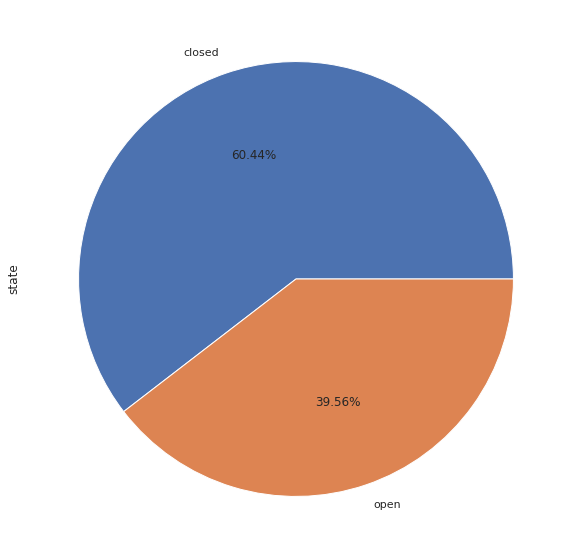

<Figure size 432x288 with 0 Axes>

In [78]:
#No of open and closed Issues
plt.figure(figsize=(15,10))
df['state'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.show()
plt.savefig('state.png')  # Exporting image


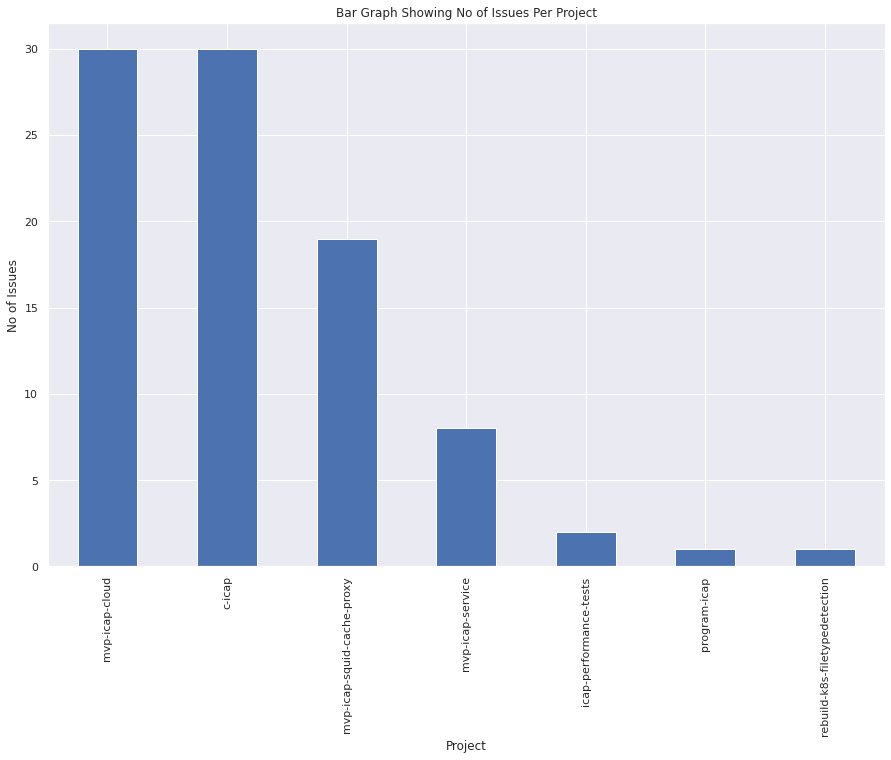

In [79]:
#Visualize the count of state, weather issues are closed or open
plt.figure(figsize=(15,10))
df["project"].value_counts().plot.bar(title="Bar Graph Showing No of Issues Per Project")
plt.ylabel('No of Issues')
plt.xlabel('Project')
plt.savefig('issue_project.png')  # Exporting image

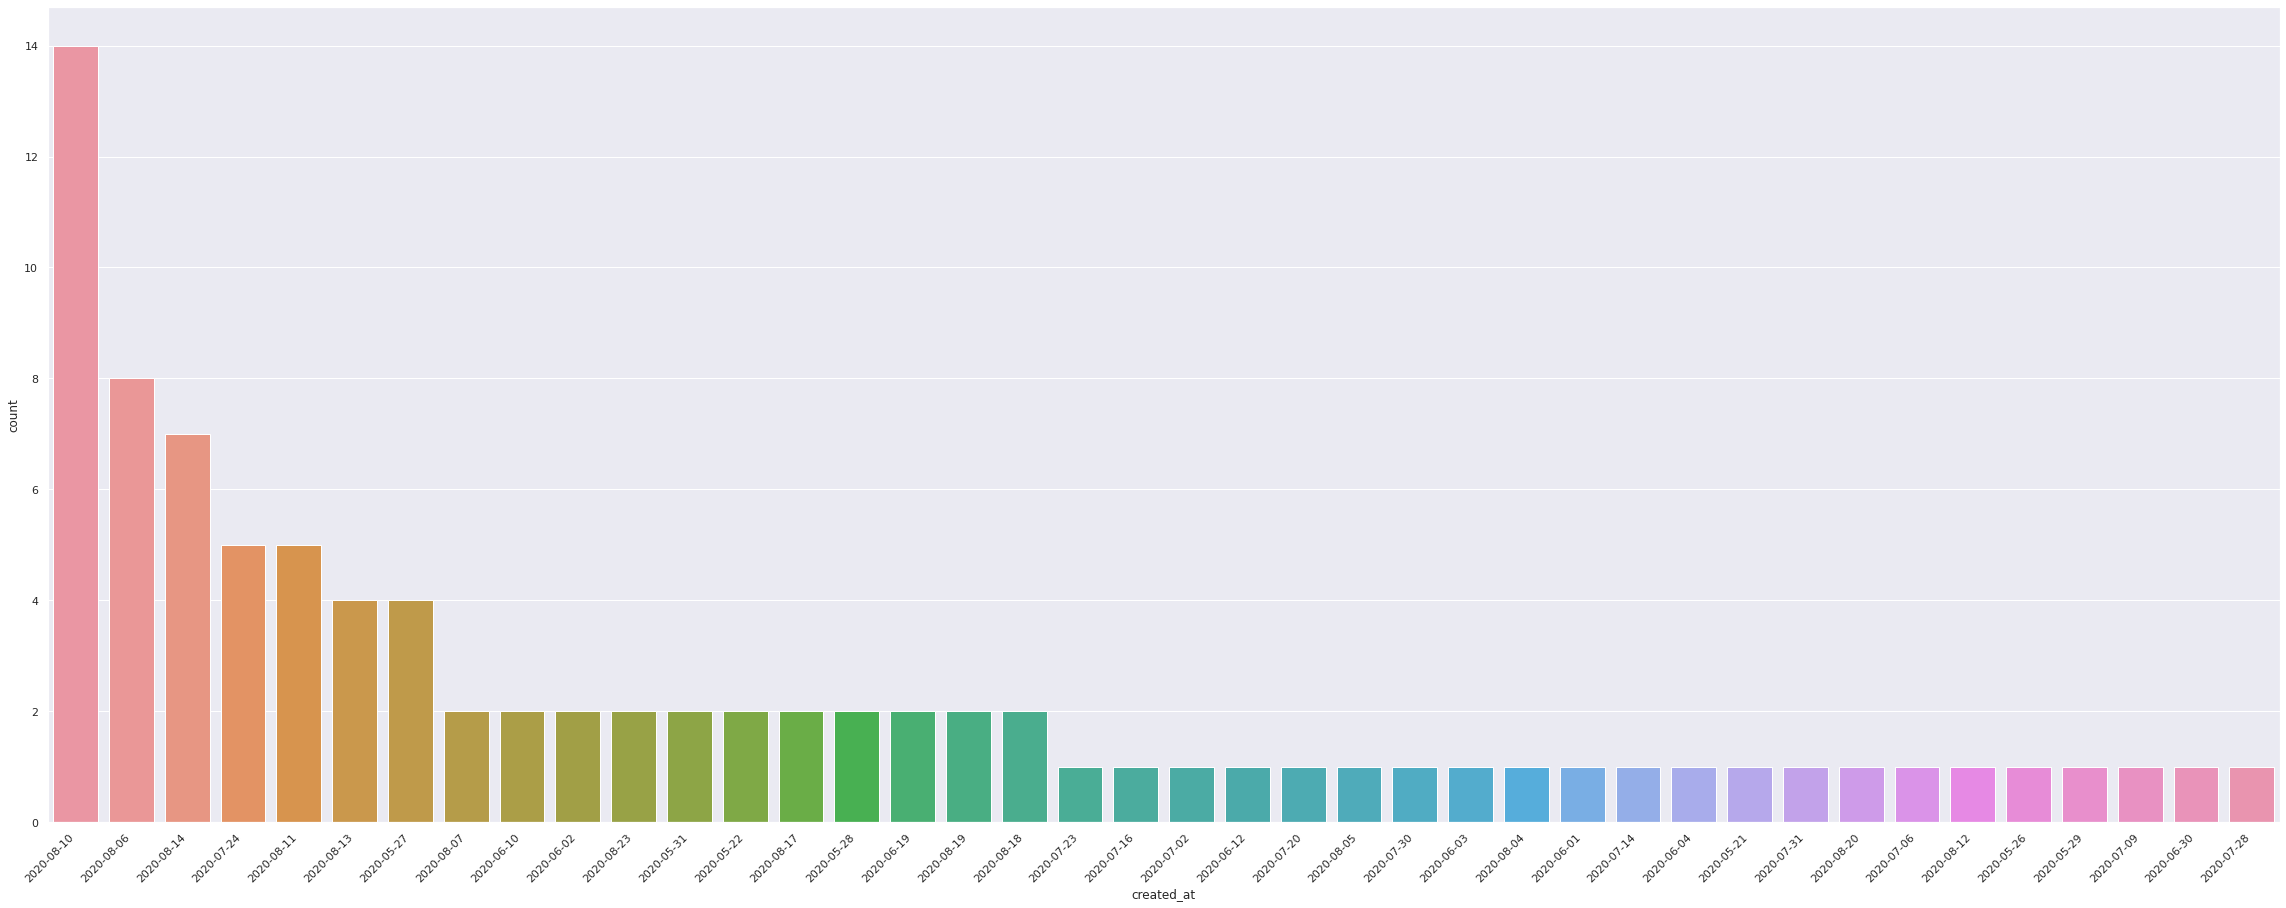

In [91]:
#Visualize Dates with no of Issues
plt.figure(figsize=(40,15))
chart = sns.countplot(
    data = df,
    x = 'created_at',
    order = df['created_at'].value_counts().index
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('days_plot.png')  # Exporting graph image

In [ ]:
# Visualising Individuals raising Issues on a particular day
df.groupby('project')['state'].value_counts().unstack().fillna(0)

state,closed,open
project,,
c-icap,29.0,1.0
icap-performance-tests,2.0,0.0
mvp-icap-cloud,20.0,10.0
mvp-icap-service,2.0,6.0
mvp-icap-squid-cache-proxy,1.0,18.0
program-icap,1.0,0.0
rebuild-k8s-filetypedetection,0.0,1.0


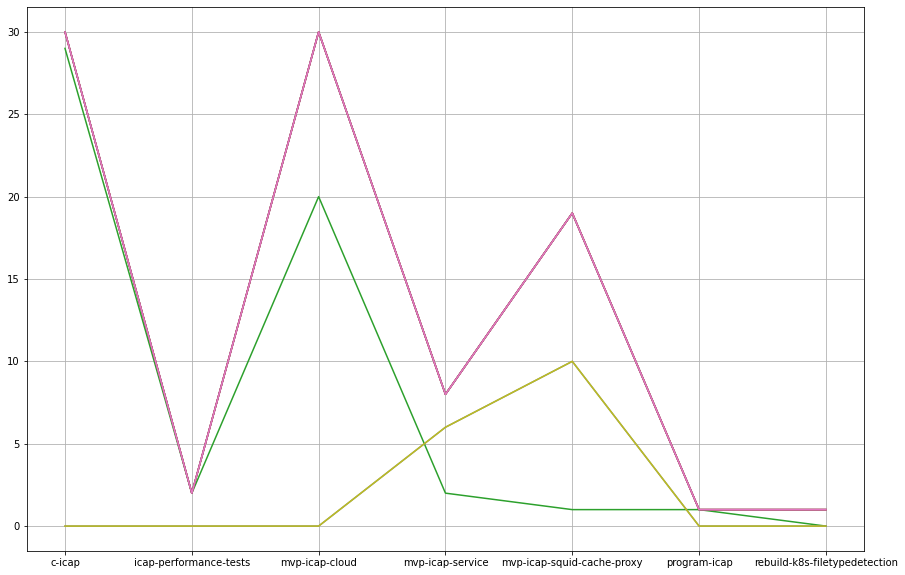

In [ ]:
keys = [pair for pair, x in df.groupby(['project'])]
plt.figure(figsize=(15,10))
plt.plot(keys, df.groupby(['project']).count())
plt.xticks(keys)
plt.grid()
plt.show()

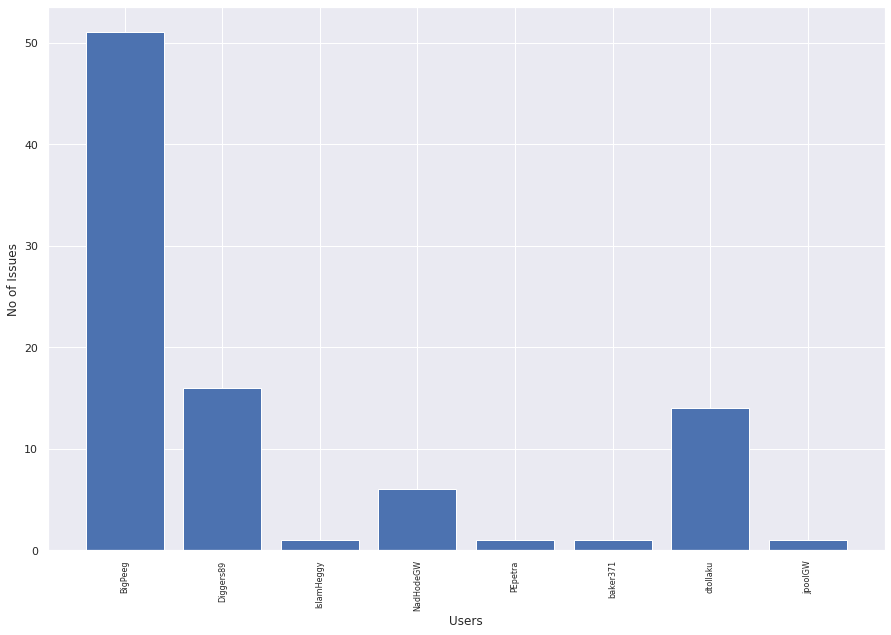

<Figure size 432x288 with 0 Axes>

In [92]:
# No of Issues per Individual

user = df.groupby('user.login')
response = user.count()['created_at']

keys = [pair for pair, df in user]
plt.figure(figsize=(15,10))
plt.bar(keys, response)
plt.xticks(keys, rotation='vertical', size=8)
plt.ylabel('No of Issues')
plt.xlabel('Users')
plt.show()
plt.savefig('user_graph.png')  # Exporting graph image